In [6]:
import json
import pandas as pd
import os

# Known venue to city mapping
venue_to_city = {
    "Eden Gardens": "Kolkata",
    "Lord's": "London",
    "Wankhede Stadium": "Mumbai",
    "Melbourne Cricket Ground": "Melbourne",
    "Sydney Cricket Ground": "Sydney",
    "Old Trafford": "Manchester",
    "Sharjah Cricket Stadium": "Sharjah",
    "Dubai International Cricket Stadium": "Dubai",
    "Adelaide Oval": "Adelaide",
    "The Oval": "London",
    "Pallekele International Cricket Stadium": "Pallekele",
    "R. Premadasa Stadium": "Colombo",
    "MA Chidambaram Stadium": "Chennai",
    "Newlands": "Cape Town",
    "SuperSport Park": "Centurion"
}

def extract_match_data(match_type, folder_path, output_prefix):
    all_matches = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)

            with open(file_path, 'r', encoding='utf-8') as f:
                match_data = json.load(f)

            info = match_data.get('info', {})

            # Ensure correct match type
            if info.get('match_type', '').lower() != match_type.lower():
                continue

            outcome = info.get('outcome', {})
            toss = info.get('toss', {})
            officials = info.get('officials', {})

            # Result margin
            result_margin = "Null"
            if 'by' in outcome:
                if 'runs' in outcome['by']:
                    result_margin = str(outcome['by']['runs']) + " runs"
                elif 'wickets' in outcome['by']:
                    result_margin = str(outcome['by']['wickets']) + " wickets"

            # Result type
            result_type = outcome.get('result', '')
            if result_type == '':
                result_type = 'normal' if 'winner' in outcome else 'unknown'

            # Venue and city
            venue = info.get('venue', 'Null')
            city = info.get('city', '')
            if city == '':
                city = venue_to_city.get(venue, 'Null')

            match_details = {
                'Match ID': file_name.replace('.json', ''),
                'Date': info.get('dates', ['Null'])[0],
                'City': city,
                'Venue': venue,
                'Teams': ', '.join(info.get('teams', [])) or 'Null',
                'Winner': outcome.get('winner', 'Null'),
                'Result Type': result_type,
                'Result Margin': result_margin,
                'Overs': info.get('overs', 'Null'),
                'Toss Winner': toss.get('winner', 'Null'),
                'Toss Decision': toss.get('decision', 'Null'),
                'Player of Match': ', '.join(info.get('player_of_match', [])) or 'Null',
                'Umpires': ', '.join(officials.get('umpires', [])) or 'Null',
                'Match Referee': ', '.join(officials.get('match_referees', [])) or 'Null',
                'Match Type': info.get('match_type', 'Null'),
                'Gender': info.get('gender', 'Null')
            }

            all_matches.append(match_details)

    df = pd.DataFrame(all_matches)
    df.to_csv(f'{output_prefix}_matches_detailed.csv', index=False)
    df.to_excel(f'{output_prefix}_matches_detailed.xlsx', index=False)

    print(f"{match_type.upper()} match data saved as CSV and Excel successfully")




In [8]:
extract_match_data(
    'odi',
    r'C:\DATA SCIENCE COURSE\secound project sample test\cricsheet_data\odis',
    'odi'
)

ODI match data saved as CSV and Excel successfully


In [9]:
extract_match_data(
    't20',
    r'C:\DATA SCIENCE COURSE\secound project sample test\cricsheet_data\t20s',
    't20'
)


T20 match data saved as CSV and Excel successfully


In [10]:
extract_match_data(
    'test',
    r'C:\DATA SCIENCE COURSE\secound project sample test\cricsheet_data\tests',
    'test'
)


TEST match data saved as CSV and Excel successfully


In [7]:
import mysql.connector
class cricket:
  def __init__(self,host,user,password,port,database,ssl_ca):
    self.host = host
    self.user = user
    self.password = password
    self.port = port
    self.database = database
    self.ssl_ca = ssl_ca
    self.conn = None
    self.cursor = None
  def connect(self):
    self.conn = mysql.connector.connect(host = self.host, user = self.user, password = self.password, port = self.port, database = self.database, ssl_ca = self.ssl_ca  )
    self.cursor = self.conn.cursor()
    print("connection sucessful")
  def create_table(self,table_query):
    self.cursor.execute(table_query)
    self.conn.commit()
  def insert_into_list_tuple(self,inser_query,list_tuple):
    self.cursor.executemany(inser_query,list_tuple)
    self.conn.commit()
    print("insert sucessful")

In [8]:
config ={"host":"gateway01.ap-southeast-1.prod.aws.tidbcloud.com", "user" : "2k28pcyNk66J4wT.root", "port":4000, "password":"MJfUrQWyu2HIZEBk", "database":"cricket_analysis", "ssl_ca":r"C:\DATA SCIENCE COURSE\secound project sample test\cricsheet_data\isrgrootx1.pem"}
db_obj = cricket(**config)


In [9]:
db_obj.connect()

connection sucessful


In [30]:
TQ = "create table Odis_matches(Match_id varchar(50),Date DATE,City varchar(100), Venue varchar(200)," \
"Teams varchar(200),Winner varchar(100),Result_Type varchar(50),Result_Margin varchar(50)," \
"Overs TINYINT UNSIGNED,Toss_winner varchar(100),Toss_decision varchar(20)," \
"Player_of_match varchar(100),Umpires varchar(100), Match_Referee varchar(50)," \
"Match_Type varchar(20),Gender varchar(10)) "
db_obj.create_table(TQ)

In [31]:
TQ = "create table T20s_matches(Match_id varchar(50),Date DATE,City varchar(100)," \
"Venue varchar(200),Teams varchar(200),Winner varchar(100),Result_Type varchar(50), "\
"Result_Margin varchar(50),Overs TINYINT UNSIGNED,Toss_winner varchar(100),"\
"Toss_decision varchar(20),Player_of_match varchar(100),Umpires varchar(100),"\
"Match_Referee varchar(50),Match_Type varchar(20),Gender varchar(10)) "
db_obj.create_table(TQ)

In [32]:
TQ = "create table Tests_matches(Match_id varchar(50),Date DATE,City varchar(100)," \
"Venue varchar(200),Teams varchar(200),Winner varchar(100),Result_Type varchar(50), "\
"Result_Margin varchar(50),Overs TINYINT UNSIGNED,Toss_winner varchar(100),"\
"Toss_decision varchar(20),Player_of_match varchar(100),Umpires varchar(100),"\
"Match_Referee varchar(50),Match_Type varchar(20),Gender varchar(10)) "
db_obj.create_table(TQ)

In [10]:
# Load CSV into DataFrame
df_odies = pd.read_csv("odi_matches_detailed.csv")
# Prepare insert query
insert_query = """
INSERT INTO odis_matches 
(Match_id, Date, City, Venue, Teams, Winner,Result_Type,Result_Margin,Toss_winner,Overs, 
Toss_decision, Player_of_match,Umpires,Match_Referee,Match_Type,Gender) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
# Convert DataFrame to list of tuples
list_of_tuples_odies = [
    (
        row['Match ID'], row['Date'], row['City'], row['Venue'], row['Teams'],row['Winner'], 
        row['Result Type'], row['Result Margin'], row['Toss Winner'], row['Overs'] ,row['Toss Decision'], 
        row['Player of Match'],row['Umpires'],row['Match Referee'],row['Match Type'],row['Gender']
    )
    for index, row in df_odies.iterrows()
]

db_obj.insert_into_list_tuple(insert_query, list_of_tuples_odies)

insert sucessful


In [11]:
# Load CSV into DataFrame
df_t20s = pd.read_csv("t20_matches_detailed.csv")
# Prepare insert query
insert_query = """
INSERT INTO t20s_matches 
(Match_id, Date, City, Venue, Teams, Winner,Result_Type,Result_Margin,Toss_winner,Overs, 
Toss_decision, Player_of_match,Umpires,Match_Referee,Match_Type,Gender) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
# Convert DataFrame to list of tuples
list_of_tuples_t20s = [
    (
        row['Match ID'], row['Date'], row['City'], row['Venue'], row['Teams'],row['Winner'], 
        row['Result Type'], row['Result Margin'], row['Toss Winner'], row['Overs'] ,row['Toss Decision'], 
        row['Player of Match'],row['Umpires'],row['Match Referee'],row['Match Type'],row['Gender']
    )
    for index, row in df_t20s.iterrows()
]

db_obj.insert_into_list_tuple(insert_query, list_of_tuples_t20s)

insert sucessful


In [12]:
import pandas as pd

# Load CSV into DataFrame
df_tests = pd.read_csv("test_matches_detailed.csv")

# Clean and rename columns
df_tests.rename(columns={
    'Match ID': 'Match_id',
    'Result Type': 'Result_Type',
    'Result Margin': 'Result_Margin',
    'Toss Winner': 'Toss_winner',
    'Toss Decision': 'Toss_decision',
    'Player of Match': 'Player_of_match',
    'Match Referee': 'Match_Referee',
    'Match Type': 'Match_Type'
}, inplace=True)

# Replace invalid string values with None (NULL in MySQL)
df_tests.replace({'Null': None, '?': None, '': None}, inplace=True)

# Ensure Overs is numeric and compatible
df_tests['Overs'] = pd.to_numeric(df_tests['Overs'], errors='coerce')

# Prepare insert query
insert_query = """
INSERT INTO tests_matches 
(Match_id, Date, City, Venue, Teams, Winner, Result_Type, Result_Margin, Toss_winner, Overs, 
Toss_decision, Player_of_match, Umpires, Match_Referee, Match_Type, Gender) 
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Convert DataFrame to list of tuples
list_of_tuples_test = [
    (
        row['Match_id'], row['Date'], row['City'], row['Venue'], row['Teams'], row['Winner'], 
        row['Result_Type'], row['Result_Margin'], row['Toss_winner'], row['Overs'],
        row['Toss_decision'], row['Player_of_match'], row['Umpires'], 
        row['Match_Referee'], row['Match_Type'], row['Gender']
    )
    for _, row in df_tests.iterrows()
]

# Insert into DB
db_obj.insert_into_list_tuple(insert_query, list_of_tuples_test)


insert sucessful


In [19]:
import pandas as pd 

In [88]:
df_odies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, 0 to 2920
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Match ID         2640 non-null   int64 
 1   Date             2640 non-null   object
 2   City             2640 non-null   object
 3   Venue            2640 non-null   object
 4   Teams            2640 non-null   object
 5   Winner           2640 non-null   object
 6   Result Type      2640 non-null   object
 7   Result Margin    2640 non-null   object
 8   Overs            2640 non-null   int64 
 9   Toss Winner      2640 non-null   object
 10  Toss Decision    2640 non-null   object
 11  Player of Match  2640 non-null   object
 12  Umpires          2640 non-null   object
 13  Match Referee    2640 non-null   object
 14  Match Type       2640 non-null   object
 15  Gender           2640 non-null   object
 16  year             2640 non-null   int32 
 17  Year             2640 non-null   int32

In [87]:
df_odies.isnull().sum()


Match ID           0
Date               0
City               0
Venue              0
Teams              0
Winner             0
Result Type        0
Result Margin      0
Overs              0
Toss Winner        0
Toss Decision      0
Player of Match    0
Umpires            0
Match Referee      0
Match Type         0
Gender             0
year               0
Year               0
dtype: int64

In [89]:
df_odies.isnull().values.any()


False

In [26]:
print(df_odies['Winner'].isnull().sum())  # number of nulls before cleaning
print(df_odies_clean['Winner'].isnull().sum())  # should be 0


0
0


In [29]:
print(df_odies['Winner'].unique())


['Australia' 'Pakistan' 'Null' 'Scotland' 'India' 'New Zealand'
 'South Africa' 'England' 'Sri Lanka' 'Bangladesh' 'Hong Kong'
 'Papua New Guinea' 'West Indies' 'Zimbabwe' 'United Arab Emirates'
 'Ireland' 'Nepal' 'Namibia' 'Netherlands' 'Oman'
 'United States of America' 'Thailand' 'Canada' 'Jersey' 'Africa XI'
 'Bermuda' 'Kenya' 'Asia XI']


In [62]:
# Remove rows where 'Winner' is 'Null', 'unknown', or 'Unknown'
df_odies = df_odies[~df_odies['Winner'].isin(['Null', 'unknown', 'Unknown'])]

# Verify the values are removed
print(df_odies['Winner'].unique())


['Australia' 'Pakistan' 'Scotland' 'India' 'New Zealand' 'South Africa'
 'England' 'Sri Lanka' 'Bangladesh' 'Hong Kong' 'Papua New Guinea'
 'West Indies' 'Zimbabwe' 'United Arab Emirates' 'Ireland' 'Nepal'
 'Namibia' 'Netherlands' 'Oman' 'United States of America' 'Thailand'
 'Canada' 'Jersey' 'Africa XI' 'Bermuda' 'Kenya' 'Asia XI']


In [64]:
# Remove rows where 'Winner' is 'Null', 'unknown', or 'Unknown'
df_odies = df_odies[~df_odies['City'].isin(['Null', 'unknown', 'Unknown'])]

# Verify the values are removed
print(df_odies['City'].unique())


['Brisbane' 'Melbourne' 'Perth' 'Sydney' 'Adelaide' 'Canberra' 'Edinburgh'
 'Christchurch' 'Nelson' 'Auckland' 'Hamilton' 'Wellington' 'London'
 'Birmingham' 'Cardiff' 'Hong Kong' 'Antigua' 'Barbados' 'Bristol'
 'Mirpur' 'Chittagong' 'Dharmasala' 'Delhi' 'Chandigarh' 'Ranchi'
 'Visakhapatnam' 'Leeds' 'Southampton' 'Manchester' 'Dublin' 'Pune'
 'Cuttack' 'Kolkata' "Cox's Bazar" 'Coffs Harbour' 'Colombo' 'Sharjah'
 'Abu Dhabi' 'Lincoln' 'Mount Maunganui' 'Bulawayo' 'Kimberley' 'Paarl'
 'East London' 'Guyana' 'Dubai' 'Derby' 'Leicester' 'Taunton'
 'Potchefstroom' 'Trinidad' 'Jamaica' 'Hambantota' 'Pallekele' 'Dunedin'
 'Whangarei' 'Chennai' 'Indore' 'Bengaluru' 'Nagpur' 'Nottingham'
 'Chester-le-Street' 'Mumbai' 'Kanpur' 'Durban' 'Centurion' 'Cape Town'
 'Johannesburg' 'Port Elizabeth' 'Dharamsala' 'Worcester' 'Hove'
 'Canterbury' 'Dhaka' 'Vadodara' 'Harare' 'Bloemfontein' 'Hobart'
 'St Kitts' 'Sylhet' 'Chattogram' 'Napier' 'Kuala Lumpur'
 'FTZ Sports Complex' 'Guwahati' 'Thiruvananthapur

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

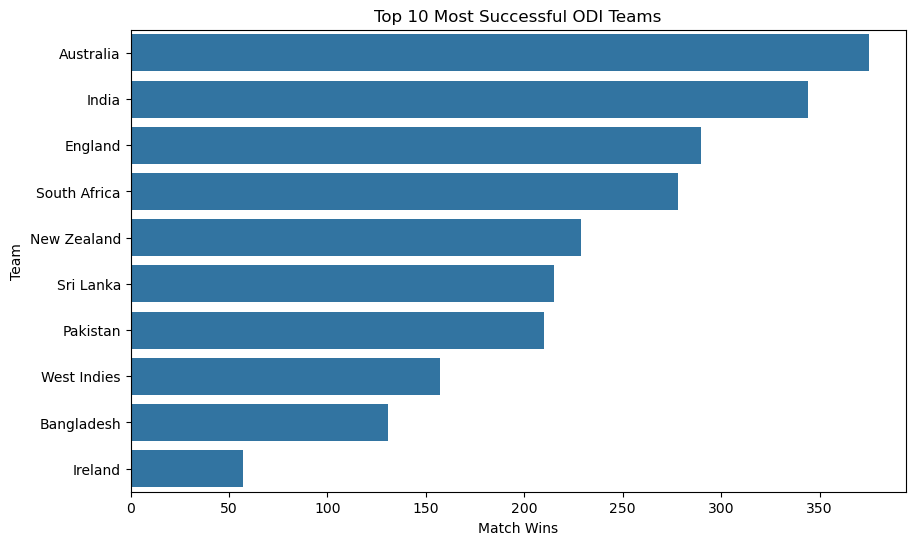

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(y='Winner', data=df_odies, order=df_odies['Winner'].value_counts().head(10).index)
plt.title('Top 10 Most Successful ODI Teams')
plt.xlabel('Match Wins')
plt.ylabel('Team')
plt.show()


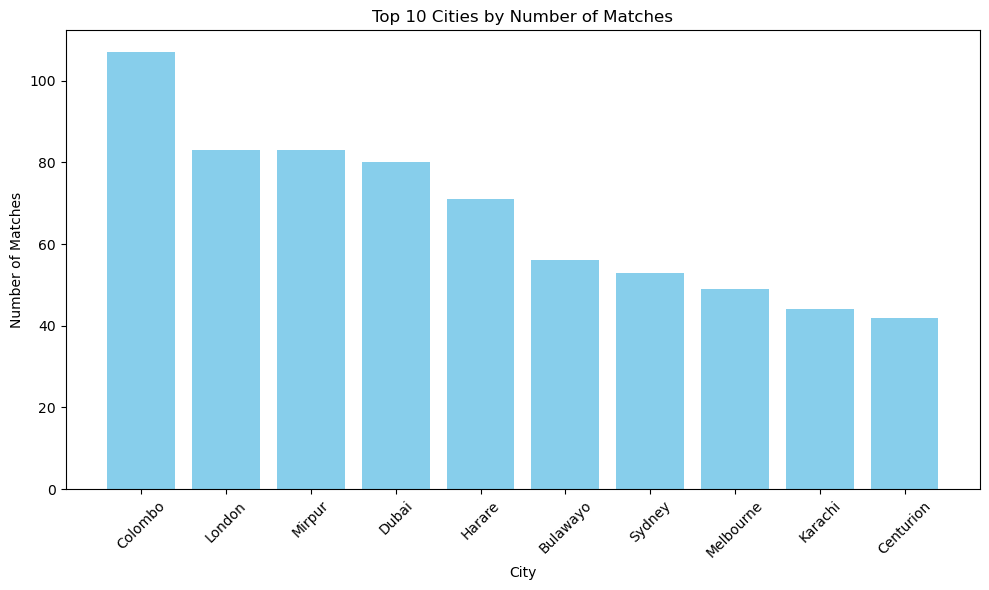

In [65]:
city_counts = df_odies['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(city_counts.index, city_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by Number of Matches')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()


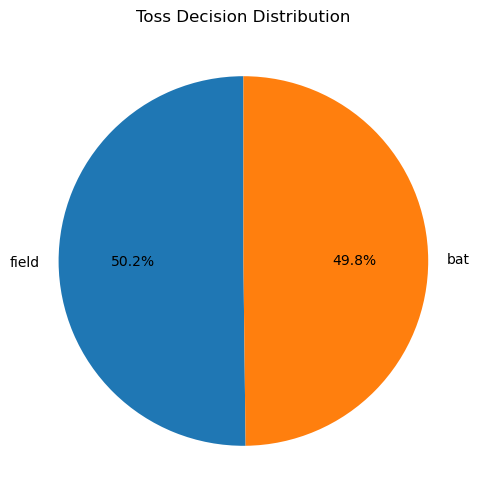

In [75]:
toss_decisions = df_odies['Toss Decision'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Decision Distribution')
plt.show()


C:\Users\aravi\AppData\Local\Temp\ipykernel_11004\1330419007.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




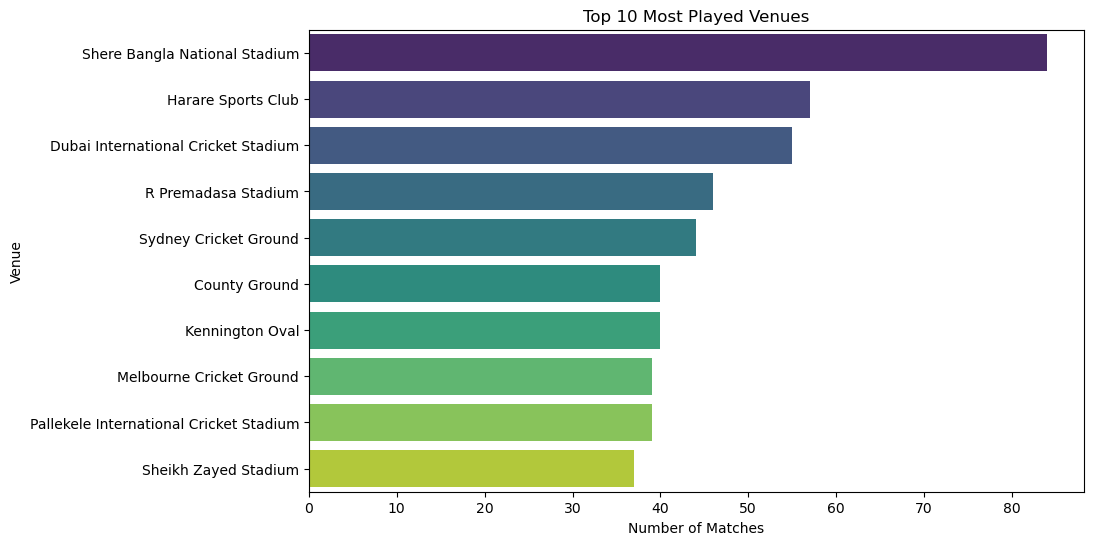

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(y='Venue', data=df_odies, order=df_odies['Venue'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Most Played Venues')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()


In [83]:
import plotly.express as px

toss_group = df_odies.groupby(['Toss Winner', 'Toss Decision']).size().reset_index(name='Count')
fig = px.bar(toss_group, x='Toss Winner', y='Count', color='Toss Decision', barmode='stack',
             title='Toss Decision by Toss Winner', labels={'Toss Winner':'Team'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [86]:
top_winners = df_odies['Winner'].value_counts().head(10).reset_index()
top_winners.columns = ['Team', 'Wins']

fig = px.treemap(top_winners, path=['Team'], values='Wins', title='Top 10 Winning Teams in ODIs')
fig.show()


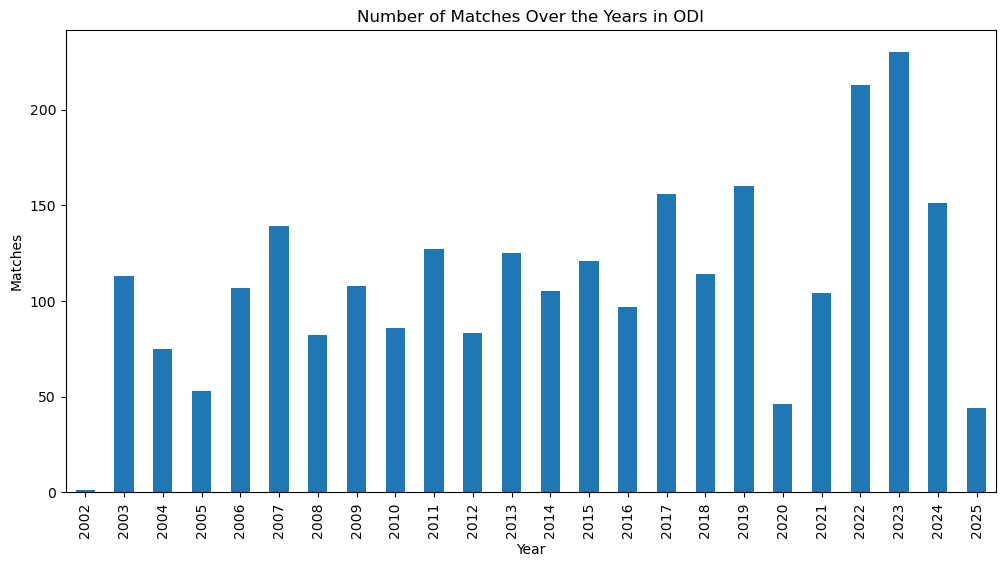

In [69]:
# 3. Matches over Years
df_odies['year'] = pd.to_datetime(df_odies['Date']).dt.year
df_odies['year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Number of Matches Over the Years in ODI')
plt.xlabel('Year')
plt.ylabel('Matches')
plt.show()